### Systematic Literature Review - Descriptive Analysis
Tamino Gaub  
12314484  
<tamino.gaub@student.uibk.ac.at> 

In [25]:
import warnings
import pandas as pd

# Suppress specific warnings
warnings.simplefilter(action='ignore', category=UserWarning)

file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df = df[df['EC/!IC'].isna()]
df = df[['Title', 'Year', 'CiteScore', 'SJR']]

# Count titles per year and save into df_pub
df_pub = df.groupby('Year').agg(count=('Title', 'size')).reset_index().sort_values('Year', ascending=False)

# Add all years from 2016 to 2025
all_years = pd.DataFrame({'Year': range(2016, 2026)})

# Merge with all years, filling missing values with count = 0
df_pub = all_years.merge(df_pub, on='Year', how='left')
df_pub['count'] = df_pub['count'].fillna(0).astype(int)
df_pub = df_pub.sort_values('Year', ascending=False)

df_pub.head(4)

,Year,count
9,2025,15
8,2024,15
7,2023,13
6,2022,8


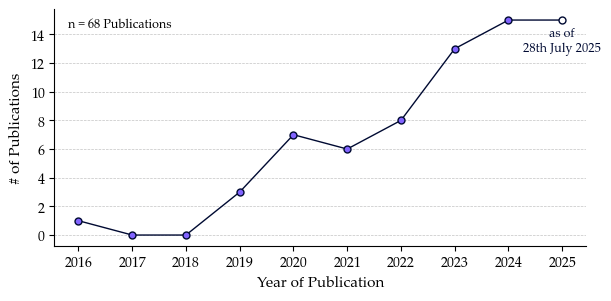

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ticker import MaxNLocator

# Load fonts
palatino_bold = fm.FontProperties(fname=r"c:\\WINDOWS\\Fonts\\PALAB.TTF")
palatino_regular = fm.FontProperties(fname=r"c:\\WINDOWS\\Fonts\\PALA.TTF")

# Adjust the size of the plot to the size of the LaTeX document
fig, ax = plt.subplots(figsize=(6.234, 3.117)) # for 448.13 pt width

# Prepare data and ensure it is sorted by year
df_plot = df_pub.sort_values('Year').reset_index(drop=True)
years = df_plot['Year'].astype(int).tolist()
counts = df_plot['count'].tolist()

# Define the target year that should be marked as preliminary
target_year = 2025
if target_year in years:
    idx = years.index(target_year)
else:
    # fallback to the last year in the series if 2025 is not present
    idx = len(years) - 1
    target_year = years[idx]

# Plot the line for the whole series (no markers)
ax.plot(years, counts,
        color='#000a32',
        linewidth=1,
        linestyle='-')

# Plot filled markers for all years except the target year
x_filled = [y for i, y in enumerate(years) if i != idx]
y_filled = [c for i, c in enumerate(counts) if i != idx]
ax.scatter(x_filled, y_filled,
           s=25,
           facecolor='#8264ff',
           edgecolor='#000a32',
           linewidth=1,
           zorder=3)

# Plot the target year (2025) as white-filled marker
ax.scatter([target_year], [counts[idx]],
           s=25,
           facecolor='white',
           edgecolor='#000a32',
           linewidth=1,
           zorder=4)

# Add annotation for 2025
ax.annotate("as of\n28th July 2025",
            xy=(target_year, counts[idx]),
            xytext=(0, -22.5), textcoords='offset points',
            fontsize=9,
            ha='center',    
            fontstyle='italic',
            fontproperties=palatino_regular,
            color='#000a32')


# Y-axis: Display whole numbers only
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# X-axis: Set ticks to each year
ax.set_xticks(years)

# Adjust the font size of the tick labels
ax.tick_params(axis='x', labelsize=11)  # X-axis: 11pt
ax.tick_params(axis='y', labelsize=11)  # Y-axis: 11pt

# Update tick label font properties
for label in ax.get_xticklabels():
    label.set_fontproperties(palatino_regular)
for label in ax.get_yticklabels():
    label.set_fontproperties(palatino_regular)

# Axis labels
ax.set_xlabel('Year of Publication', fontsize=11, fontproperties=palatino_regular)
ax.set_ylabel('# of Publications', fontsize=11, fontproperties=palatino_regular) # '# of Papers'
ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='#aaaaab')

# Display number of publications
ax.text(0.025, 0.925, f"n = {df_plot['count'].sum()} Publications", transform=ax.transAxes,
        ha='left', style='italic', fontproperties=palatino_regular, fontsize=9)

# Only show left and bottom axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Plot Outputs/03_SLR_Publication_Trend.pdf', dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [27]:
# Calculate statistics
len_df = len(df)
avg_sjr = pd.to_numeric(df['SJR'], errors='coerce').mean()
avg_citescore = pd.to_numeric(df['CiteScore'], errors='coerce').mean()
median_sjr = pd.to_numeric(df['SJR'], errors='coerce').median()
median_citescore = pd.to_numeric(df['CiteScore'], errors='coerce').median()

# Print statistics
print(f"Papers in the dataframe: {len_df}")
print(f"Average SJR: {avg_sjr:.2f}")
print(f"Median SJR: {median_sjr:.2f}")
print(f"Average CiteScore: {avg_citescore:.2f}")
print(f"Median CiteScore: {median_citescore:.2f}")

Papers in the dataframe: 68
Average SJR: 1.47
Median SJR: 1.51
Average CiteScore: 11.23
Median CiteScore: 10.20


### Dataset and Code Availability

In [22]:
file_path = '../02_SLR_20250726.xlsx'

# Read the Excel file and filter rows where 'EC/!IC' is NaN
df = pd.read_excel(file_path, sheet_name='SLR - 26.07.2025', header=1)
df = df[df['EC/!IC'].isna()]
df = df[['Title', 'Dataset Av.', 'Code Av.']]

# Set dtype to string for 'Dataset Av.' and 'Code Av.'
df['Dataset Av.'] = df['Dataset Av.'].astype(str)
df['Code Av.'] = df['Code Av.'].astype(str)
df.head()

,Title,Dataset Av.,Code Av.
4,Automatic zipper tape defect detection using t...,False,False
5,Artificial intelligence-enabled defect detecti...,On Request,False
6,Towards region-based robotic machining system ...,False,False
7,Semi-supervised adaptive network for commutato...,False,False
14,Deep object detection framework for automated ...,False,False


In [23]:
# Show distinct values in 'Code Av.' and 'Dataset Av.' columns
print('Distinct values in Code Av.:', df['Code Av.'].unique())
print('Distinct values in Dataset Av.:', df['Dataset Av.'].unique())
print('Number of entries in Code Av.:', df['Code Av.'].count())
print('Number of entries in Dataset Av.:', df['Dataset Av.'].count())

Distinct values in Code Av.: ['False' 'On Request' 'True']
Distinct values in Dataset Av.: ['False' 'On Request' 'True']
Number of entries in Code Av.: 68
Number of entries in Dataset Av.: 68


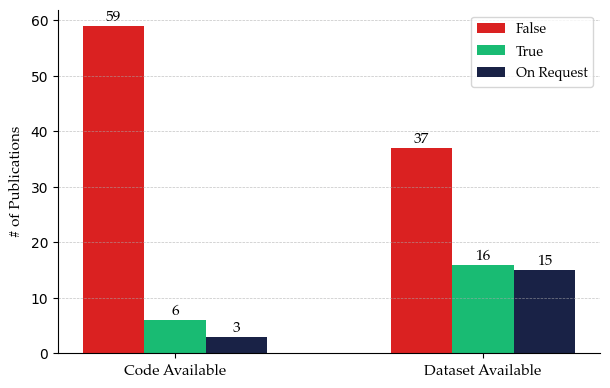

In [24]:
import numpy as np

# Load fonts
palatino_bold = fm.FontProperties(fname=r"c:\WINDOWS\Fonts\PALAB.TTF")
palatino_regular = fm.FontProperties(fname=r"c:\WINDOWS\Fonts\PALA.TTF")

# Aggregate data
categories = ['False', 'True','On Request']
code_counts = df['Code Av.'].value_counts().reindex(categories, fill_value=0)
dataset_counts = df['Dataset Av.'].value_counts().reindex(categories, fill_value=0)

# Create a DataFrame for easier plotting
counts = pd.DataFrame({
    'Code Available': code_counts,
    'Dataset Available': dataset_counts
}).T

# Plot settings
fig, ax = plt.subplots(figsize=(6.2, 4))
plt.subplots_adjust(left=0.12, right=0.95, top=0.9, bottom=0.15)
x = np.arange(len(counts))  # Positionen für Gruppen (2)
bar_width = 0.2
colors = {
    'False': '#d60909',       # Red
    'On Request': '#000a32',  # Darkblue
    'True': '#00b464'         # Green
}

# Plot bars for each category
for i, cat in enumerate(categories):
    bars = ax.bar(
        x + (i - (len(categories)-1)/2) * bar_width,  # zentrieren
        counts[cat],
        width=bar_width,
        label=cat,
        color=colors[cat],
        alpha=0.9
    )

    # Numbers above the bars
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.2,
            f"{int(height)}",
            ha='center',
            va='bottom',
            fontproperties=palatino_regular,
            fontsize=11,
            color='#000000'
        )

# Adjust the font size of the tick labels
ax.set_xticks(x)
ax.set_xticklabels(counts.index, fontproperties=palatino_regular, fontsize=11)

ax.set_ylabel("# of Publications", fontproperties=palatino_regular, fontsize=11)

# Adjust frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7, color='#aaaaab')

# Plot legend
ax.legend(title="", prop=palatino_regular, fontsize=11)

plt.tight_layout()
plt.savefig('Plot Outputs/04_Code_Dataset_Availability.pdf', dpi=600, bbox_inches='tight', transparent=True)
plt.show()
